 # Лабораторная работа №5: Линейная регрессия





 Вечканова П.А., группа 6133-010402


## Задание:

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Датасет должен содержать как минимум количественные признаки. Если категориальных нет, то пропустить пункты с временным убиранием категориальных признаков. Желательно наличие обоих типов признаков в датасете.
2. Датасет и подготовка данных, этап 1:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Нормализовать численные данные.
   - Визуализировать `heatmap`-матрицу кореллированности признаков.
   - Визуализировать взаимосвязь между `target`-переменной и каждым из признаком (с использованием `srs.pairplot` или `pandas.plotting.scatter_matrix`). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с `sns.FacetGrid` в лекции).
   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо временно убрать категориальные признаки (исходные датафреймы сохранить для 2 этапа).
3. Регрессия МНК:
   - Обучить модель линейной регрессии `LinearRegression`.
   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.
   - Вывести `model.coef_` и `model.intercept_`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
4. Для каждого вида регрессии (`Ridge`, `LASSO`, `Elastic Net`):
   - С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge` и `LASSO`, `alpha` и `l1_ratio` для `Elastic Net`)
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе для наилучшей модели ($MSE$, $MAE$ и $R^2$).
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).  
   
   > Запомнить лучшие модели для 2 этапа.
5. Датасет и подготовка данных, этап 2:
   - Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками.
   - Закодировать категориальные признаки в обучающей и тестовой выборках.
6. Регрессии, этап 2:
   - Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками.
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).
   - Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.
   - Выбрать лучшую модель.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Вывести значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).
7. Сделать вывод:
   - Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).
   - Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).
   - Вывод о результатах использования `Recursive Feature Elimination` (лучше или хуже - значения метрик).
   

### 1. Считать в `pandas.dfFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [157]:
import pandas as pd

df = pd.read_csv("/content/Star3642_balanced.csv")

df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


## 2. Датасет и подготовка данных, этап 1:


   - Привести описание датасета.


Датасет содержит признаки:

| Признак     | Описание                                                                 |
|-------------|--------------------------------------------------------------------------|
| Vmag        | Видимая звёздная величина (чем меньше значение, тем ярче звезда)          |
| Plx         | Параллакс звезды (используется для расчёта расстояния до звезды в парсеках) |
| e_Plx       | Стандартная ошибка параллакса (рекомендуется удалить строки с высокой погрешностью) |
| B-V         | Цветовой индекс B-V (0 или отрицательный — горячие звёзды, 2.0 — холодные) |
| SpType      | Спектральный класс звезды (например, K3III, B1II, G3III и т.д.)           |
| Amag        | Абсолютная звёздная величина (яркость звезды на стандартном расстоянии 10 пк) |
| TargetClass | Класс звезды: 0 — карлик, 1 — гигант                                      |

   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".


In [158]:
df = df[df['e_Plx'] < 0.1 * df['Plx']]
df = df.drop(columns=['e_Plx'])

In [159]:
numerical = ['Vmag', 'Plx', 'B-V', 'Amag']
categorical = ['SpType', 'TargetClass']

   - Нормализовать численные данные.


In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

   - Визуализировать `heatmap`-матрицу кореллированности признаков.


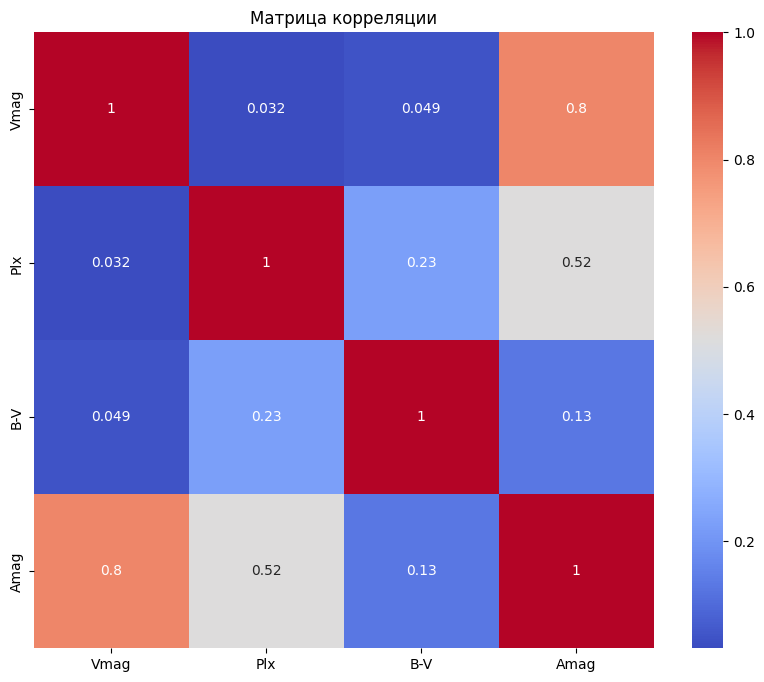

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

   - Визуализировать взаимосвязь между `target`-переменной и каждым из признаком (с использованием `srs.pairplot` или `pandas.plotting.scatter_matrix`). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с `sns.FacetGrid` в лекции).


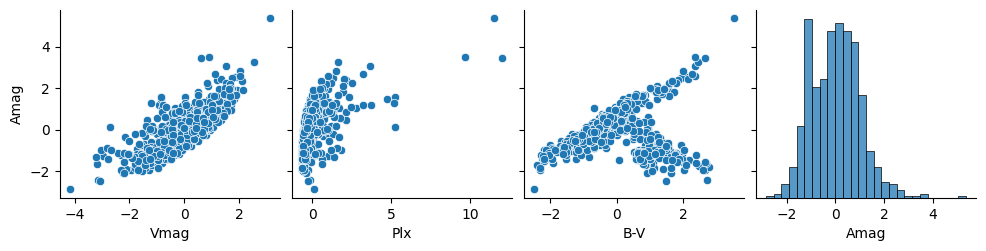

In [162]:
sns.pairplot(df[numerical], y_vars='Amag')
plt.show()

   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо временно убрать категориальные признаки (исходные датафреймы сохранить для 2 этапа).

In [163]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Amag'] + categorical)
y = df['Amag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Регрессия МНК:


   - Обучить модель линейной регрессии `LinearRegression`.


In [164]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.


In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Метрики LinearRegression:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

Метрики LinearRegression:
MSE: 0.15
MAE: 0.26
R²: 0.87


   - Вывести `model.coef_` и `model.intercept_`.


In [166]:
print(f"Коэффициенты: {lr.coef_}")
print(f"Intercept: {lr.intercept_:.2f}")

Коэффициенты: [ 0.79803403  0.5265087  -0.02339689]
Intercept: 0.01


   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

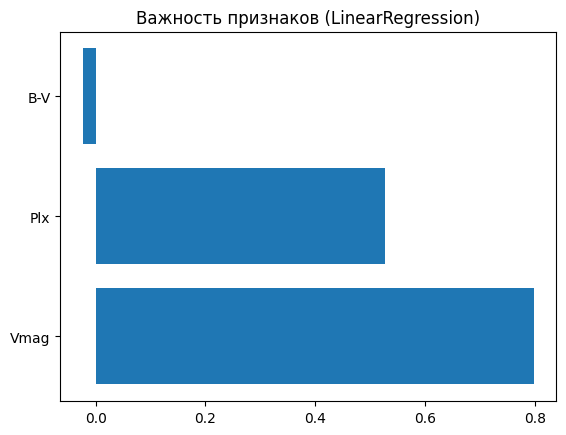

In [167]:
plt.barh(X.columns, lr.coef_)
plt.title('Важность признаков (LinearRegression)')
plt.show()

## 4. Для каждого вида регрессии (`Ridge`, `LASSO`, `Elastic Net`):


   - С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge` и `LASSO`, `alpha` и `l1_ratio` для `Elastic Net`)


In [168]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

models = {
    'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'LASSO': (Lasso(), {'alpha': [0.1, 0.5, 1.0]}),
    'ElasticNet': (ElasticNet(), {'alpha': [0.1, 1.0], 'l1_ratio': [0.3, 0.5, 0.7]})
}

best_models = {}
best_params = {}

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    best_params[name] = grid.best_params_

   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе для наилучшей модели ($MSE$, $MAE$ и $R^2$).


In [169]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)

    print(f"\nМетрики {name}:")
    print(f"Лучшие параметры: {best_params[name]}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")
    print(f"Коэффициенты: {model.coef_}")
    print(f"Intercept: {model.intercept_:.2f}")


Метрики Ridge:
Лучшие параметры: {'alpha': 10.0}
MSE: 0.14
MAE: 0.26
R²: 0.88
Коэффициенты: [ 0.78383849  0.51605761 -0.02067827]
Intercept: 0.01

Метрики LASSO:
Лучшие параметры: {'alpha': 0.1}
MSE: 0.14
MAE: 0.30
R²: 0.88
Коэффициенты: [0.69098822 0.41110977 0.        ]
Intercept: 0.01

Метрики ElasticNet:
Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.3}
MSE: 0.14
MAE: 0.29
R²: 0.88
Коэффициенты: [ 0.71294542  0.45293369 -0.        ]
Intercept: 0.01


   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

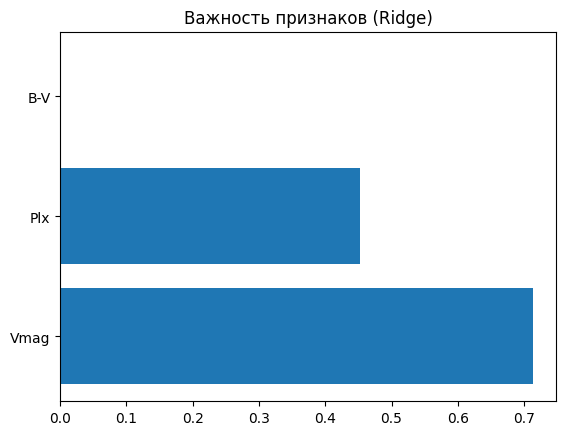

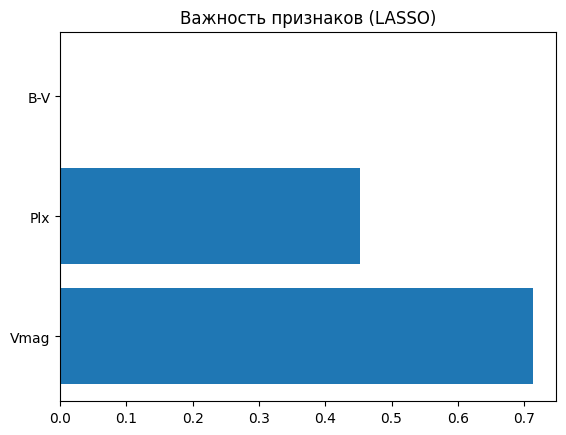

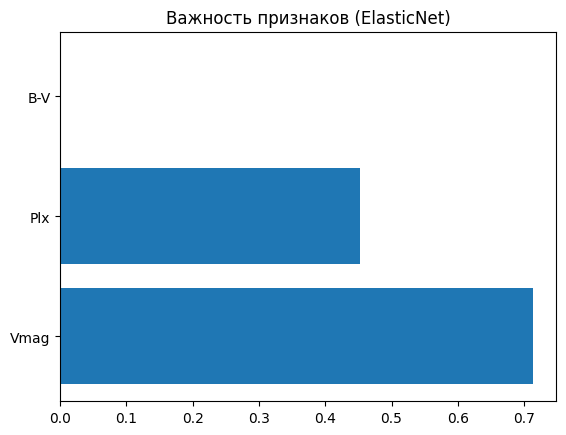

In [170]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)

    plt.barh(X.columns, grid.best_estimator_.coef_)
    plt.title(f'Важность признаков ({name})')
    plt.show()

## 5. Датасет и подготовка данных, этап 2:


   - Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками.


In [171]:
from sklearn.preprocessing import OneHotEncoder

numerical = ["Vmag", "Plx", "B-V"]
categorical = ["SpType", "TargetClass"]

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

   - Закодировать категориальные признаки в обучающей и тестовой выборках.

In [172]:
#Кодирую категориальные признаки
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first")
X_cat = encoder.fit_transform(df[categorical])

#Объединяю числовы и категориальные признаки
X_full = pd.concat(
    [
        df[numerical].reset_index(drop=True),
        pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(categorical))
    ],
    axis=1
)

#Разделяю на тестовую и обучающие выборки
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

## 6. Регрессии, этап 2:


   - Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками.


In [173]:
models_full = {
    'Linear': LinearRegression(),
    'Ridge': best_models['Ridge'],
    'LASSO': best_models['LASSO'],
    'ElasticNet': best_models['ElasticNet']
}

trained_models = {}
predictions = {}

for name, model in models_full.items():
    model.fit(X_train_full, y_train)
    y_pred = model.predict(X_test_full)
    trained_models[name] = model
    predictions[name] = y_pred

   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).


In [174]:
for name, model in trained_models.items():
    y_pred = predictions[name]

    print(f"Модель: {name}")
    print(f"Гиперпараметры: {model.get_params()}")

    print("\nКоэффициенты (coef_):")
    for feature, coef in zip(X_train_full.columns, model.coef_):
        print(f"{feature}: {coef:.4f}")
    print(f"\nIntercept: {model.intercept_:.4f}")

    print("\nМетрики:")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")

Модель: Linear
Гиперпараметры: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Коэффициенты (coef_):
Vmag: 0.6578
Plx: 0.5937
B-V: -0.2048
SpType_A0V: -0.6549
SpType_A0Vn: -0.4902
SpType_A0Vnn: -0.8154
SpType_A1/A2IV: -0.3406
SpType_A1V: -0.3285
SpType_A1Vn: -0.0000
SpType_A1Vs: 0.0000
SpType_A2IV: -0.5062
SpType_A2V: -0.6416
SpType_A2Vnn: -0.2977
SpType_A2Vs: 0.0000
SpType_A3III: 0.5673
SpType_A3IV: -0.0388
SpType_A3V: -0.5076
SpType_A4IV: -0.6044
SpType_A4V: -0.3527
SpType_A5III: 0.4330
SpType_A5IV: -0.4376
SpType_A5IV-V: -0.2838
SpType_A5V: -0.1694
SpType_A5V...: -0.1984
SpType_A5Vn: 0.0000
SpType_A5Vv SB: -0.1351
SpType_A6V: -0.3533
SpType_A7III: 0.5571
SpType_A7IV: -0.3799
SpType_A7V: -0.0910
SpType_A7Vn: -0.4001
SpType_A7Vvar: -0.1010
SpType_A8III/IV: -0.4800
SpType_A8IV: -0.5058
SpType_A8IV+...: -0.3765
SpType_A8IV/V: -0.7055
SpType_A9/F0III: 0.3886
SpType_A9/F0IV: -0.3284
SpType_A9II: 0.0000
SpType_A9IV:: 0.0000
SpType_A9V: -0.3623
SpType_B3Vp: 0.000

   - Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.


Все модели улучшили метрики после добавления категориальных признаков.

Наибольший вклад внес SpType.

   - Выбрать лучшую модель.


Лучшей моделью оказалась Ridge с категориальными признаками и значениями метрик, представленными ниже

In [175]:
y_pred = predictions['Ridge']
print("\nМетрики:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")


Метрики:
MSE: 0.10
MAE: 0.23
R²: 0.91


   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).


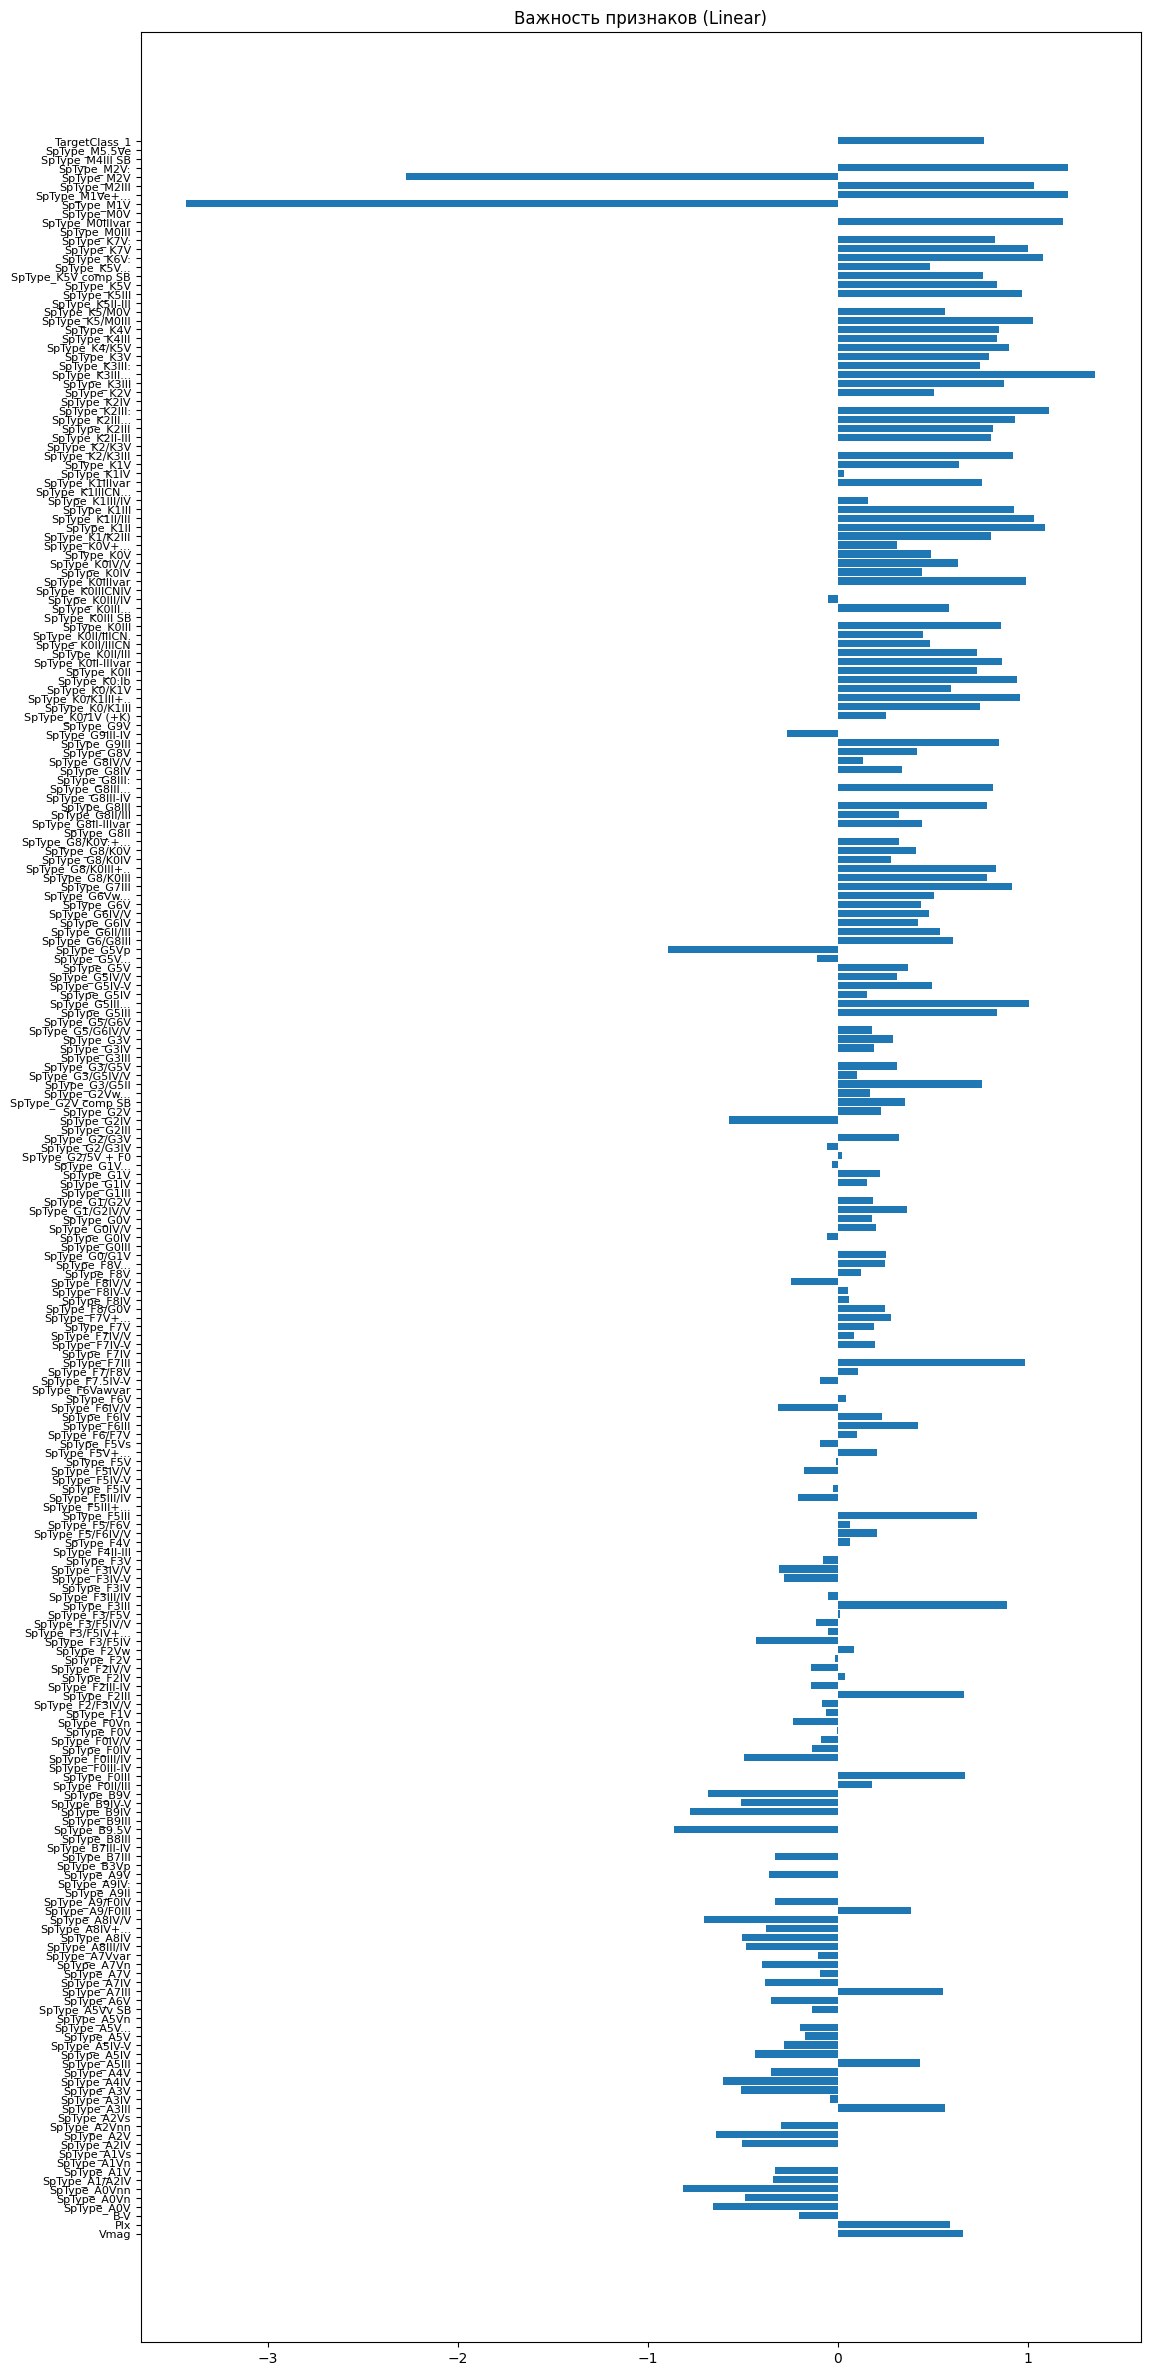

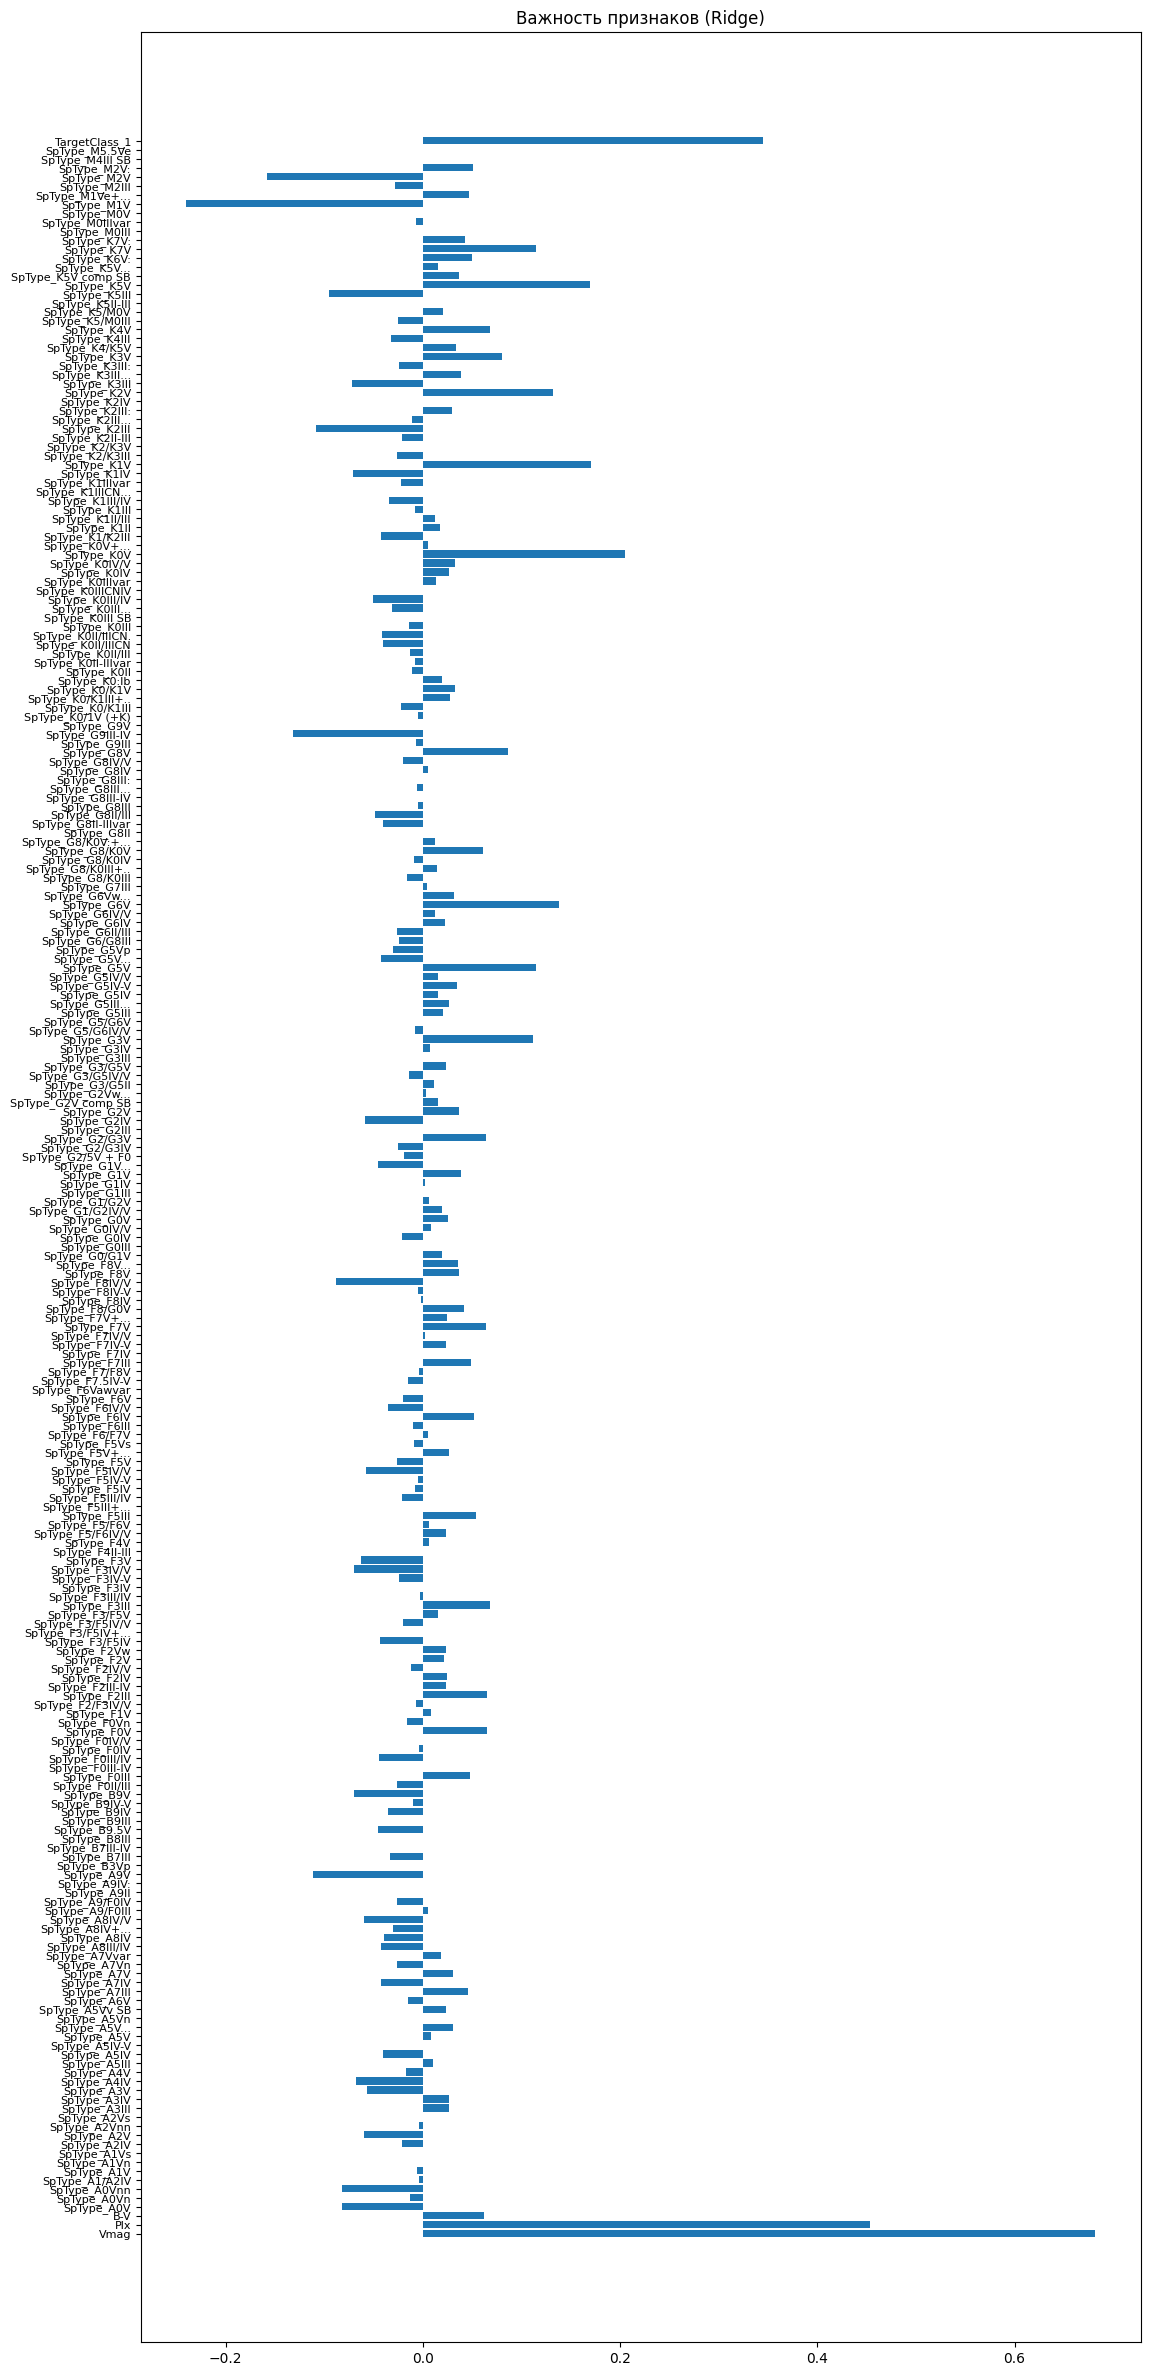

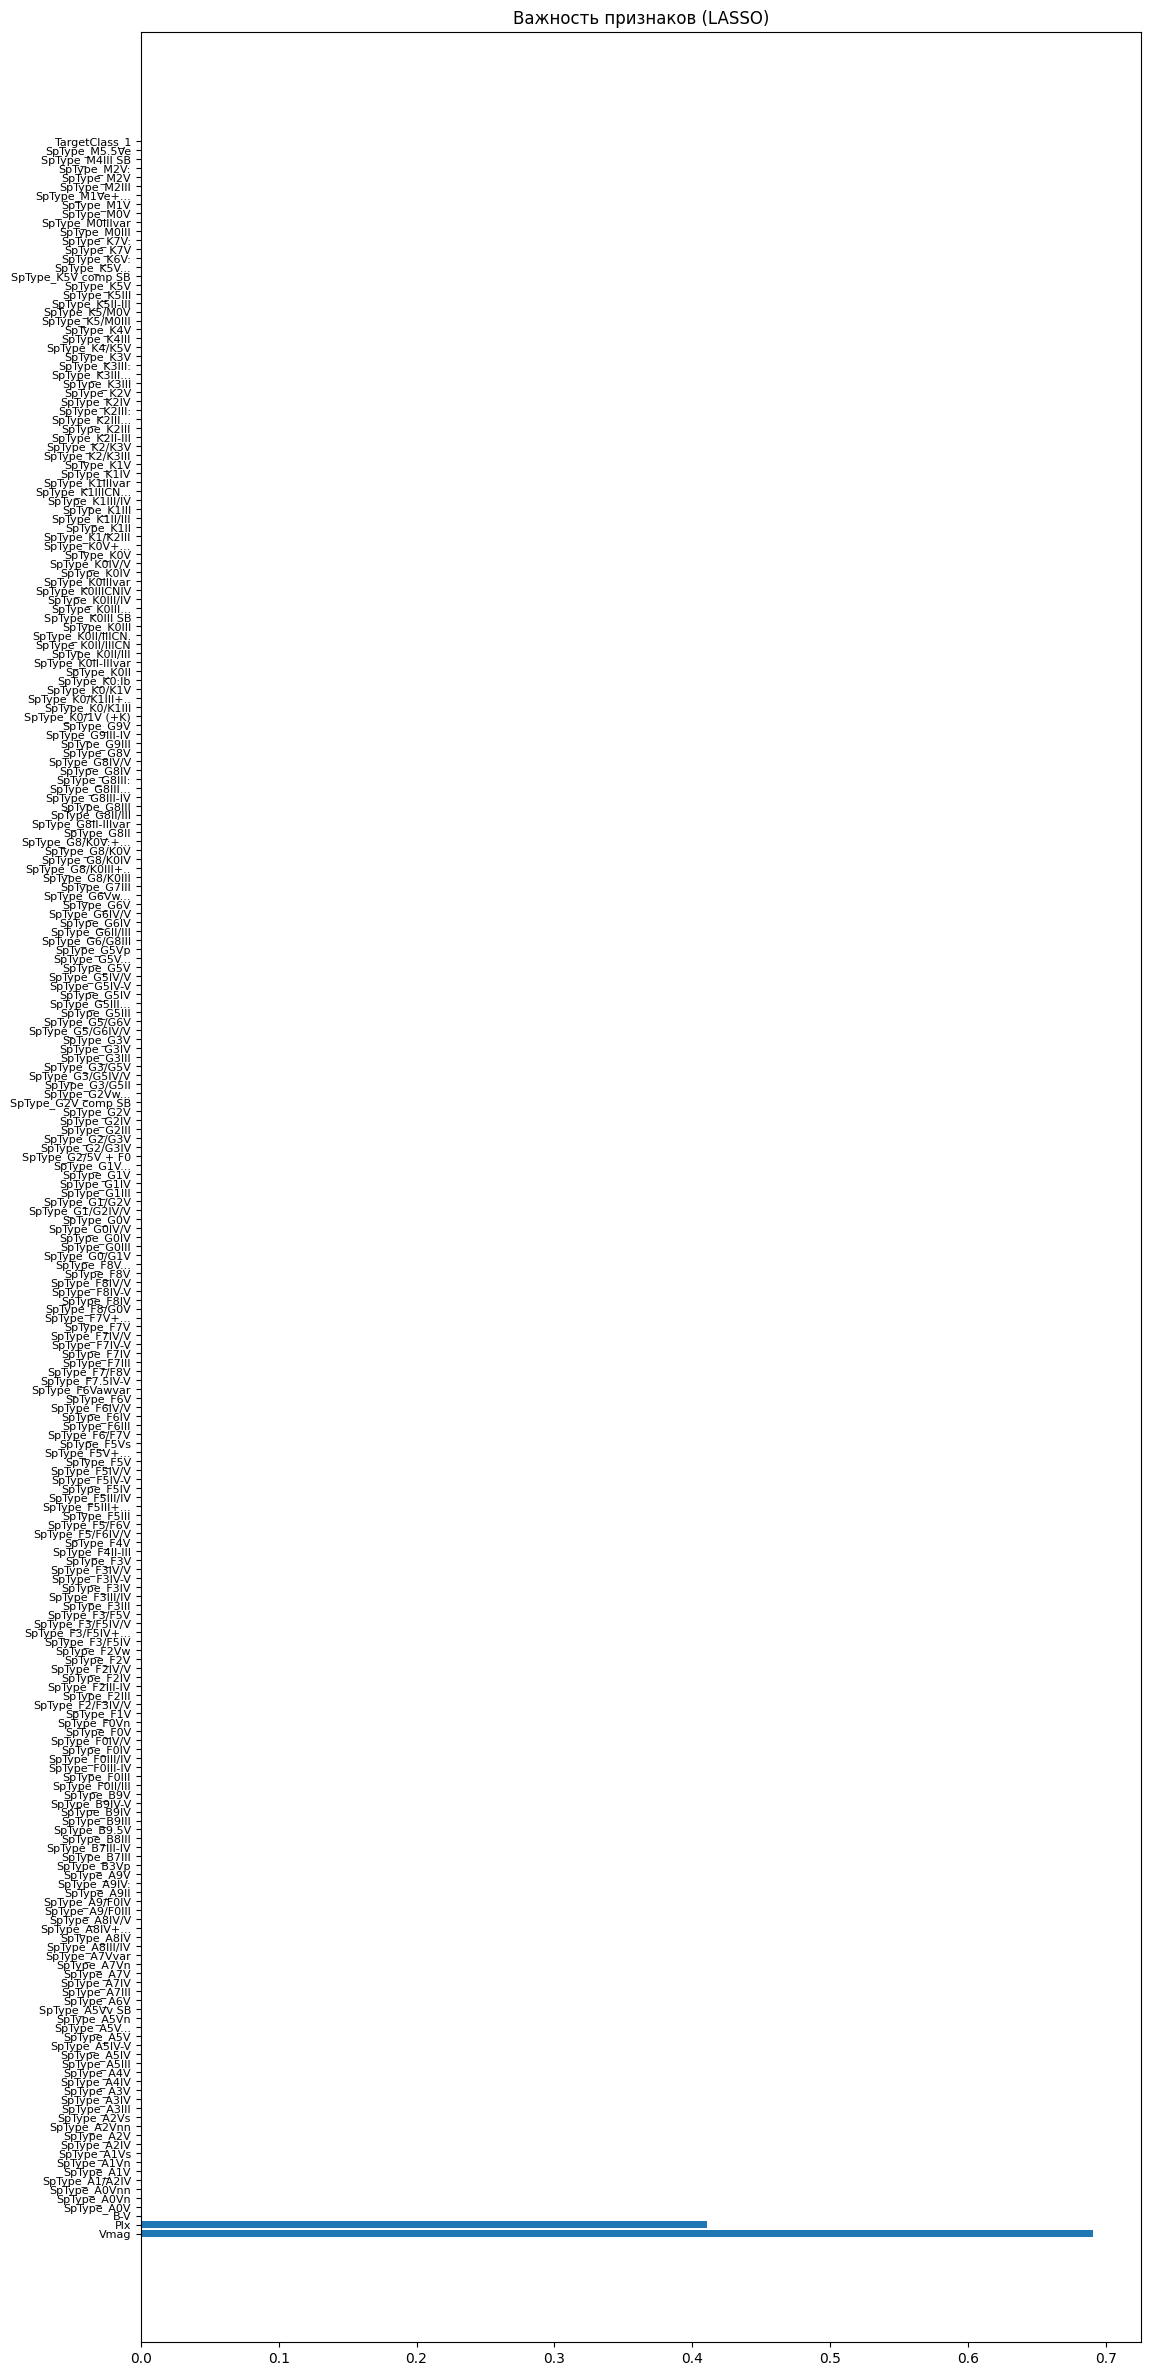

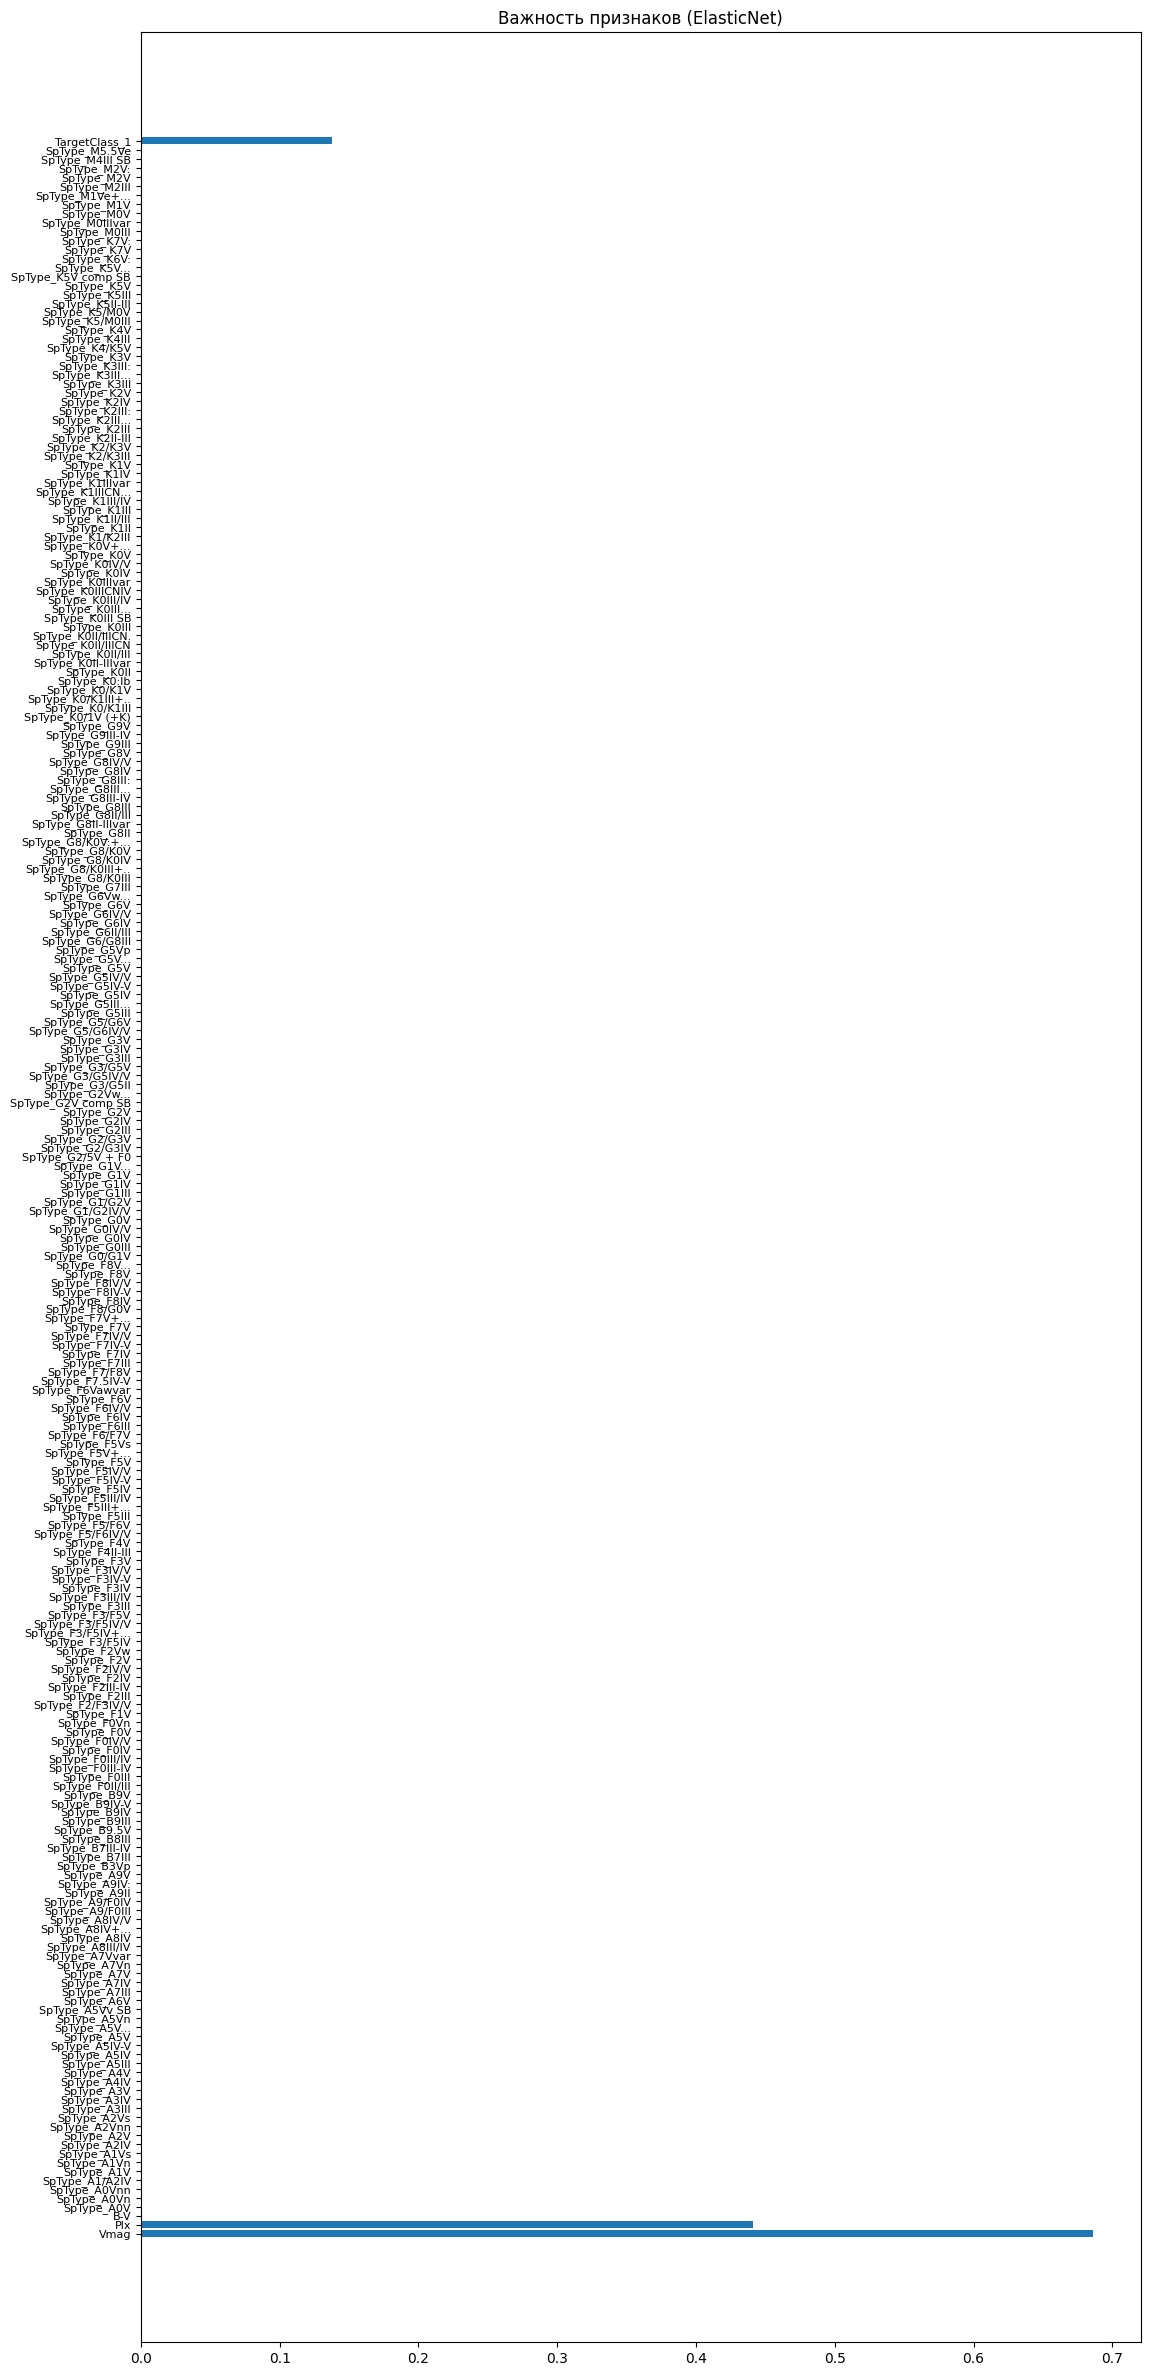

In [176]:
for name, model in trained_models.items():
    plt.figure(figsize=(20, 30))
    plt.barh(
        X_full.columns,
        model.coef_,
        height=0.8
    )
    plt.title(f'Важность признаков ({name})')
    plt.yticks(fontsize=8)
    plt.subplots_adjust(left=0.4)
    plt.show()
    print('\n')

#К сожалению, из-за OneHotEncoder количество признаков увеличилось в очень-очень много раз и графики стали плохочитаемыми

   - Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`.


In [177]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=Ridge(alpha=1.0), n_features_to_select=5)
rfe.fit(X_train_full, y_train)
X_train_rfe = rfe.transform(X_train_full)
X_test_rfe = rfe.transform(X_test_full)

ridge_rfe = best_models['Ridge']
ridge_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = ridge_rfe.predict(X_test_rfe)

   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).


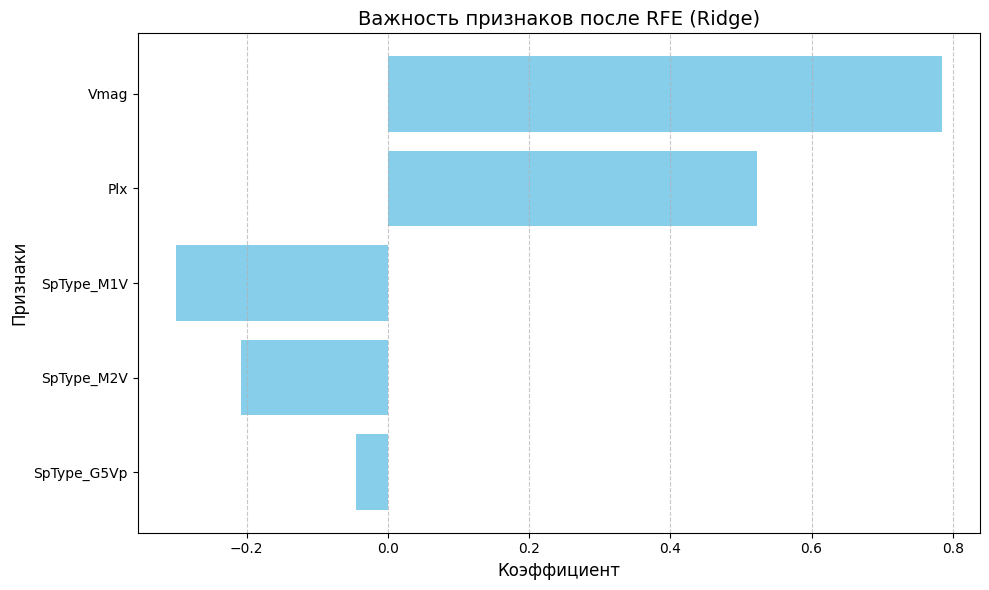

In [178]:
import numpy as np

selected_features = X_train_full.columns[rfe.support_]
coefficients = ridge_rfe.coef_

sorted_idx = np.argsort(np.abs(coefficients))[::-1]
sorted_coef = coefficients[sorted_idx]
sorted_features = selected_features[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coef, color='skyblue')
plt.title('Важность признаков после RFE (Ridge)', fontsize=14)
plt.xlabel('Коэффициент', fontsize=12)
plt.ylabel('Признаки', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

   - Вывести значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).

In [179]:
print("\nМетрики после RFE (Ridge):")
print(f"MSE: {mean_squared_error(y_test, y_pred_rfe):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rfe):.2f}")
print(f"R²: {r2_score(y_test, y_pred_rfe):.2f}")


Метрики после RFE (Ridge):
MSE: 0.15
MAE: 0.26
R²: 0.87


## 7. Сделать вывод:


   - Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).


Ridge с параметром alpha: 10 оказалась наилучшей, однако другие модели не сильно хуже нее (они отличаются только метрикой MAE, которая для Ridge равна 0.26)

   - Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).


Ridge с параметром alpha: 10 оказалась наилучшей с метриками MSE: 0.10, MAE: 0.23, R²: 0.91

   - Вывод о результатах использования `Recursive Feature Elimination` (лучше или хуже - значения метрик).

Для лучшей модели Ridge использование Recursive Feature Elimination ухудшило метрики: MSE: 0.15, MAE: 0.26, R²: 0.87